In [1]:
from models.diffusion import StableDiffusion
import torch
from torchvision import transforms
from transformers import CLIPTokenizer
from PIL import Image


prompt = "A dog stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

# Comment to disable image to image
image_path = "./images/dog.jpg"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 1

## SAMPLER
num_inference_steps = 50
seed = 42

model = StableDiffusion()

output = model.generate(input_image=input_image,
                        prompt=prompt,
                        uncond_promt=uncond_prompt,
                        do_cfg=do_cfg,
                        cfg_scale=cfg_scale,
                        device='mps',
                        strength=strength,
                        inference_steps=num_inference_steps,
                        sampler='ddim',
                        use_cosine_schedule=True,
                        tokenizer=CLIPTokenizer('./weights/clip/tokenizer_vocab.json', merges_file='./weights/clip/tokenizer_merges.txt')
                       )


/Users/dnnhhuy/Study/pytorch-course/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:21<00:00,  2.34it/s]


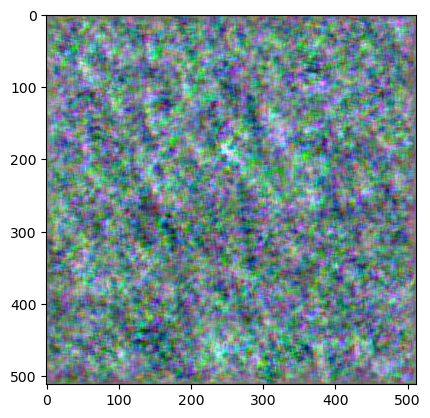

In [3]:
from matplotlib import pyplot as plt
plt.imshow(output)